# Problem 1 - Salary Data Analysis Using ANOVA

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

(Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.)

### Importing all necessary libraries

In [1]:
import numpy as np                                            
import pandas as pd                                           
import seaborn as sns                                         
from statsmodels.formula.api import ols                       
from statsmodels.stats.anova import _get_covariance,anova_lm 
%matplotlib inline                                           

### Importing the dataset

In [2]:
sal_dat = pd.read_csv('Salary_Data.csv')

### Checking the top 5 records

In [3]:
sal_dat.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


### Checking the shape and information of the dataset

In [4]:
sal_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


### Checking the summary of the dataframe

In [5]:
sal_dat.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Education,40,3,Doctorate,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,40,4,Prof-specialty,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,40,NaN,NaN,NaN,162187,64860.4,50103,99897.5,169100,214441,260151


### Checking distinct values of Education & Occupation

In [6]:
sal_dat['Education'].unique()

array([' Doctorate', ' Bachelors', ' HS-grad'], dtype=object)

In [7]:
sal_dat['Education'].nunique()

3

In [8]:
sal_dat['Occupation'].unique()

array([' Adm-clerical', ' Sales', ' Prof-specialty', ' Exec-managerial'],
      dtype=object)

In [9]:
sal_dat['Occupation'].nunique()

4

### Removing trailing & leading spaces from the dataset

In [10]:
sal_dat['Education'] = sal_dat['Education'].str.strip()
sal_dat['Occupation'] = sal_dat['Occupation'].str.strip()

## Q1.1) State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

### The Hypothesis of One Way ANOVA for 'Education' with respect to 'Salary'

$H_0$: The mean salary of individuals is same for all 3 levels of Education.

$H_A$: For at least one level of Education, mean salary of individuals is different.

### The Hypothesis of One Way ANOVA for 'Occupation' with respect to 'Salary'

$H_0$: The mean salary of individuals is same for all 4 levels of Occupation.

$H_A$: For at least one level of Occupation, mean salary of individuals is different.

Where,

$H_0$ = Null Hypothesis

$H_A$ = Alternate Hypothesis

Also, it is given that the dataset qualifies all the assumptions for ANOVA.
- Each group sample is drawn from a normally distributed population
- All populations have a common variance
- All samples are drawn independently of each other
- Within each sample, the observations are sampled randomly and independently of each other
- Factor effects are additive

## Q1.2) Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

### Conversion of Education variable from 'Object' to 'Categorical' data type.

In [11]:
sal_dat.Education = pd.Categorical(sal_dat.Education)

### Verifiying data type conversion of variables

In [12]:
sal_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   40 non-null     category
 1   Occupation  40 non-null     object  
 2   Salary      40 non-null     int64   
dtypes: category(1), int64(1), object(1)
memory usage: 912.0+ bytes


### Sub-dividing dataset according to categories of Education variable

In [13]:
Education_1 = sal_dat[sal_dat['Education']=='Doctorate']['Salary']
Education_2 = sal_dat[sal_dat['Education']=='Bachelors']['Salary']
Education_3 = sal_dat[sal_dat['Education']=='HS-grad']['Salary']

### The Hypothesis of One Way ANOVA for 'Education' with respect to 'Salary'
$H_0$: The mean salary of individuals is same for all 3 levels of Education.

$H_A$: For at least one level of Education, mean salary of individuals is different.

In [14]:
formula = 'Salary ~ C(Education)'
model = ols(formula, sal_dat).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,30.95628,1.257709e-08
Residual,37.0,6.137256e+10,1.658718e+09,NaN,NaN


From the above table, we see that the corresponding p-value is less than alpha (0.05). Thus, we reject the Null Hypothesis and accept the alternate hypothesis.

Therefore, for at least one level of Education, mean salary of individuals is different.

## Q1.3) Perform one-way ANOVA for Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

### Conversion of Occupation variable from 'Object' to 'Categorical' data type.

In [15]:
sal_dat.Occupation = pd.Categorical(sal_dat.Occupation)

### Verifiying data type conversion of variables

In [16]:
sal_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Education   40 non-null     category
 1   Occupation  40 non-null     category
 2   Salary      40 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 824.0 bytes


### Sub-dividing dataset according to categories of Education & Occupation variable

In [17]:
Occupation_1 = sal_dat[sal_dat['Occupation']=='Adm-clerical']['Salary']
Occupation_2 = sal_dat[sal_dat['Occupation']=='Sales']['Salary']
Occupation_3 = sal_dat[sal_dat['Occupation']=='Prof-specialty']['Salary']
Occupation_4 = sal_dat[sal_dat['Occupation']=='Exec-managerial']['Salary']

### The Hypothesis of One Way ANOVA for 'Occupation' with respect to 'Salary'
$H_0$: The mean salary of individuals is same for all 4 levels of Occupation.

$H_A$: For at least one level of Occupation, mean salary of individuals is different.

In [18]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, sal_dat).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Occupation),3.0,1.125878e+10,3.752928e+09,0.884144,0.458508
Residual,36.0,1.528092e+11,4.244701e+09,NaN,NaN


From the above table, we see that the corresponding p-value is greater than alpha (0.05). Thus, we fail to reject the Null hypothesis.

Therefore, the mean salary of individuals is same for all 4 levels of Occupation.

## Q1.4) If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.

We know the null hypothesis is rejected in (1.2). We can find the difference in class means using two methods
- Tukey Honest Significance Test
- Point Plot of Education vs Salary

### Method-1: Tukey Honest Significance Test

In [19]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
# null hypo = Means are different
# alt hypo = Means are same

In [20]:
mc = MultiComparison(sal_dat['Salary'],sal_dat['Education'])
result = mc.tukeyhsd()
print(result)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
  group1    group2    meandiff   p-adj     lower        upper    reject
-----------------------------------------------------------------------
Bachelors Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
Bachelors   HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
Doctorate   HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-----------------------------------------------------------------------


From the above table, we can say that:
- The mean salary of individuals who are Doctorate & Bachelors is very large compared to those who are HS-grad.
- There is a moderate difference in mean salaries of individuals who are Doctorates and Bachelors.

### Method-2: Point Plot of Education vs Salary

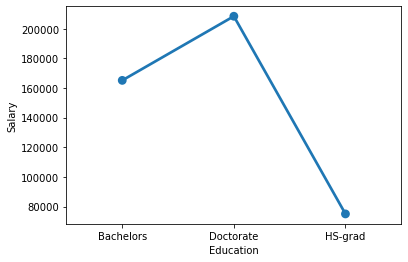

In [21]:
sns.pointplot(x='Education', y='Salary', data=sal_dat, ci=None);

From the above graph, we can say that:
- The mean salary of individuals who are Doctorate & Bachelors is very large compared to those who are HS-grad.
- There is a moderate difference in mean salaries of individuals who are Doctorates and Bachelors.

## Q1.5) What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

The interaction between two treatments (categorical variables Occupation & Education in this case) with respect to continuous measure (Salary variable in this case) is said to exist, if, the response of continuous measure to one categorical variable depends on another categorical variable.
- Interaction effects represent the combined effects of factors on the dependent measure.
- When an interaction effect is present, the impact of one factor depends on the level of the other factor.
- When interaction effects are present, it means that interpretation of the main effects is incomplete or misleading. 

Interaction plot shows level of interaction by the number of intersection points.
- More the number of intersection points in the graph, higher the interaction level between concerned variables and vice-versa.

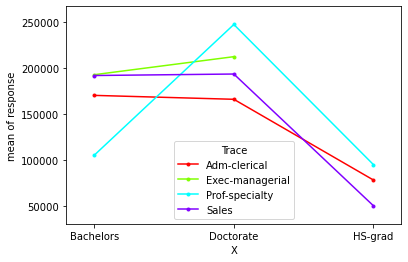

In [22]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(np.array(sal_dat['Education']),np.array(sal_dat['Occupation']),np.array(sal_dat['Salary']));

From the graph above, we can say that:
- There are several intersection points in the graph which shows there is a decent level of interaction between Occupation & Education variable.

## Q1.6) Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

A two-way ANOVA with interaction tests three null hypotheses at the same time:
- Null Hypothesis ($H_0$):
  - There is no difference in mean salary of individuals at any level of Education.
  - There is no difference in mean salary of individuals for any type of Occupation.
  - There is no interaction effect between Education and Occupation on average salary.
- Alternate Hypothesis ($H_A$):
  - There is a difference in mean salary of individuals at any level of Education.
  - There is a difference in mean salary of individuals for any type of Occupation.
  - There is an interaction effect between Education and Occupation on average salary.

A two-way ANOVA without interaction (a.k.a. an additive two-way ANOVA) only tests the first two of these hypotheses.

### Two Way ANOVA without the interaction effect terms

In [23]:
formula = 'Salary ~ C(Education) + C(Occupation)'
model = ols(formula, sal_dat).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,31.257677,1.981539e-08
C(Occupation),3.0,5.519946e+09,1.839982e+09,1.120080,3.545825e-01
Residual,34.0,5.585261e+10,1.642724e+09,NaN,NaN


### Two Way ANOVA with the interaction effect terms

In [24]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, sal_dat).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


Due to the inclusion of the interaction effect term, we can see a slight change in the p-value of the first two dependencies as compared to the Two-Way ANOVA without the interaction effect terms.

Since, One-Way ANOVA has already been performed individually for Education & Occupation variable above, we are concerned only with the results of third hypothesis here (interaction test between Education & Occupation with respect to Salary)

And, since, The p-value of the interaction effect term of 'Education' and 'Occupation' is less than 0.05 the Null Hypothesis is rejected in this case and we can accept the alternate hypothesis.

Therefore,
- There is a difference in mean salary of individuals at any level of Education.
- There is no difference in mean salary of individuals for any type of Occupation.
- There is an interaction effect between Education and Occupation on average salary.

This means Education & Occupation variable when combined together influence the mean salaries of individuals.

## Q1.7) Explain the business implications of performing ANOVA for this particular case study.

By using ANOVA for the dataset, we came to know that – 
- Occupations of people alone do not influence mean salaries of individuals.
- Educational qualifications of people alone on the other hand do influence mean salaries of individuals.
- However, Occupation & Education when combined together do influence mean salaries of individuals.
- Also, from the interaction plot we come to know that the mean salaries of individuals with higher secondary degree is very less compared to the ones with Bachelor’s degree. Also, the mean salaries of individuals with Bachelor’s and Doctorates are almost same. If a business decision is to be taken based on the mean salaries for the entire population, we need to make sure the decision taken affects the entire population in a positive way and it does not lead to any kind of bias for any group.

# Problem 2 - EDA & PCA 

The dataset 'Education - Post 12th Standard.csv' contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: 'Data Dictionary.xlsx'.

### Importing all necessary libraries

In [25]:
import pandas as pd               # For Dataframe manipultion
import numpy as np                # For numerical calculation & arrays
import matplotlib.pyplot as plt   # For visualization
import seaborn as sns             # For visualization
import warnings                   
warnings.filterwarnings('ignore')

### Importing the Dataset

In [26]:
df = pd.read_csv('Education_Post_12th_Standard.csv')

## Q2.1) Perform Exploratory Data Analysis (both univariate and multivariate analysis to be performed). What insight do you draw from the EDA?

### Basic Data Exploration

In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:
- Head of the dataset
- Shape of the dataset
- Info of the dataset
- Summary of the dataset

In [27]:
df.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [29]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Names,777,777,University of Indianapolis,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apps,777,NaN,NaN,NaN,3001.64,3870.2,81,776,1558,3624,48094
Accept,777,NaN,NaN,NaN,2018.8,2451.11,72,604,1110,2424,26330
Enroll,777,NaN,NaN,NaN,779.973,929.176,35,242,434,902,6392
Top10perc,777,NaN,NaN,NaN,27.5586,17.6404,1,15,23,35,96
Top25perc,777,NaN,NaN,NaN,55.7967,19.8048,9,41,54,69,100
F.Undergrad,777,NaN,NaN,NaN,3699.91,4850.42,139,992,1707,4005,31643
P.Undergrad,777,NaN,NaN,NaN,855.299,1522.43,1,95,353,967,21836
Outstate,777,NaN,NaN,NaN,10440.7,4023.02,2340,7320,9990,12925,21700
Room.Board,777,NaN,NaN,NaN,4357.53,1096.7,1780,3597,4200,5050,8124


In [30]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print('Presence of null values:',df.isnull().sum().any())

Number of duplicate rows = 0
Presence of null values: False


#### Observations of basic Data Exploration:

- Dataset has 18 columns and 777 rows.
- The entire dataset is of integer data type. However, column 'Names' is object datatype & S.F. Ratio is float datatype.
- No duplicate records.
- No null values.
- Grad.Rate has a maximum value of 118. This has to cleaned.
- We have to investigate further for outliers.

### Outlier Identification

In [31]:
cat = []
nums = []

for i in df.columns:
    if df[i].dtype == 'O':
        cat.append(i)
    else:
        nums.append(i)

nums

['Apps',
 'Accept',
 'Enroll',
 'Top10perc',
 'Top25perc',
 'F.Undergrad',
 'P.Undergrad',
 'Outstate',
 'Room.Board',
 'Books',
 'Personal',
 'PhD',
 'Terminal',
 'S.F.Ratio',
 'perc.alumni',
 'Expend',
 'Grad.Rate']

In [32]:
newdf = df[nums]

### Univariate Analysis
#### Boxplot to see the value range & variation of all variables.

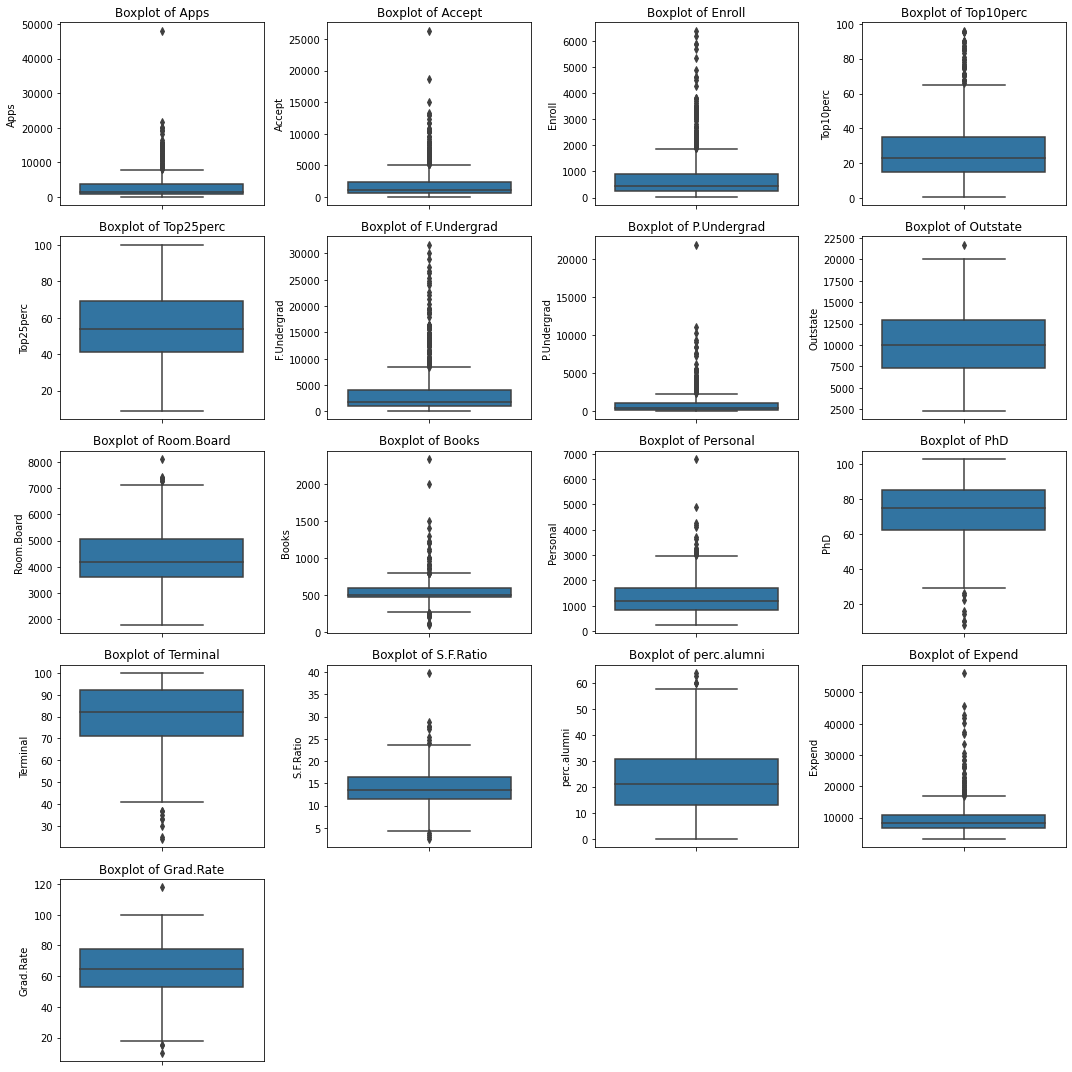

In [33]:
plt.figure(figsize=(15,15))
feature_list = newdf.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = newdf[feature_list[i]], data = newdf)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

#### Distplot to check the kind of value distribution of each variable.

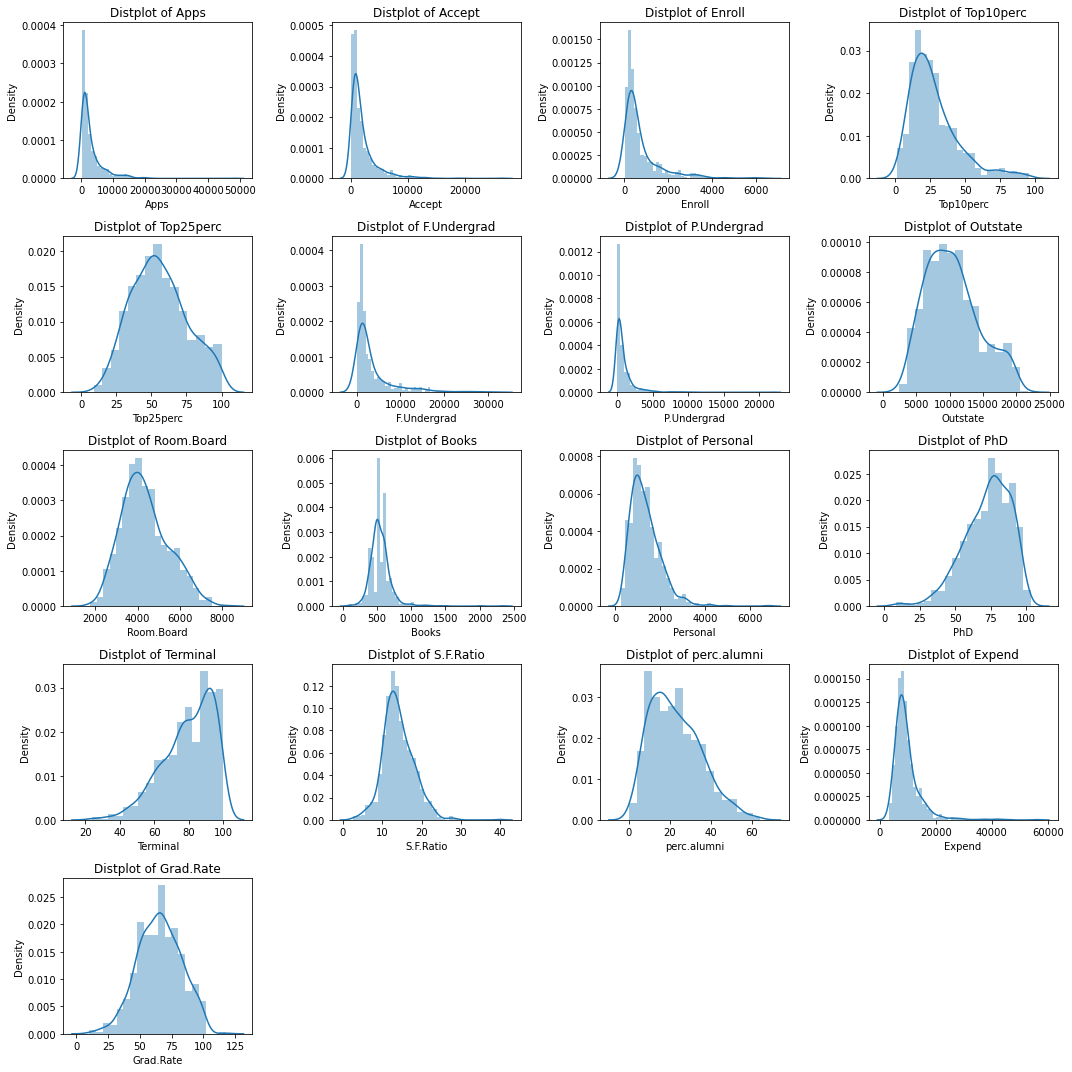

In [34]:
plt.figure(figsize=(15,15))
feature_list = newdf.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.distplot(newdf[newdf.columns[i]])
    plt.title('Distplot of {}'.format(feature_list[i]))
    plt.tight_layout()

#### Observations:
- The variables Apps, Accept, Enroll, Top10%, F.Undergrad, P.Undergrad, Books, Personal, % Alumni and Expend have a right-skewed distribution.
- The variables PHD & Terminal have a left-skewed distribution.
- The variables Top25%, Outstate, RoomBoard, S.F.Ratio, Grad Rate have a normal distribution.

### Multivariate Analysis

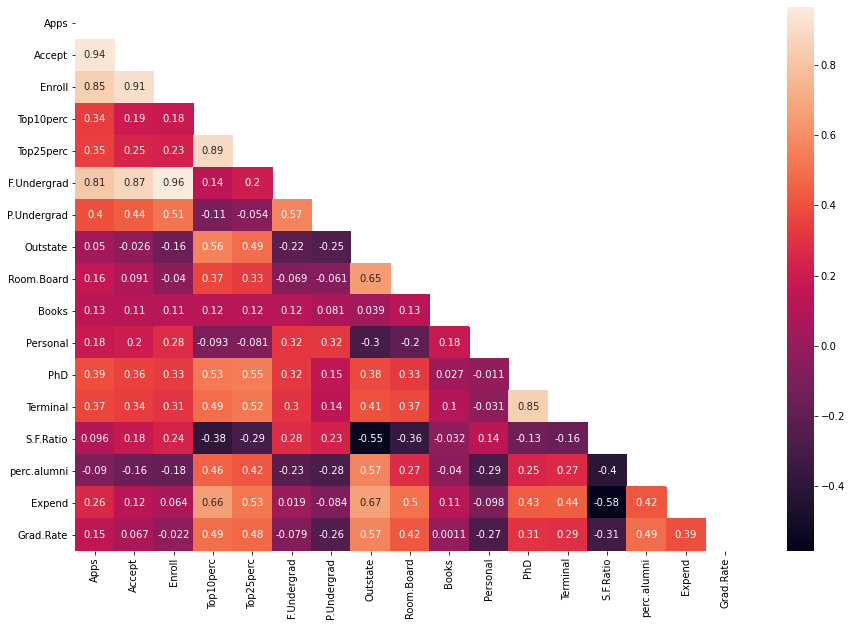

In [35]:
plt.figure(figsize=(15,10));
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,annot=True,mask=mask);

#### Observations:
- Variable Apps, Accept, Enroll & F.Undergrad have a strong correlation with one another.
- Variable Top10% has a very strong correlation with Top25%.
- Variable PhD has a strong correlation with Terminal.

## Q2.2) Is scaling necessary for PCA in this case? Give justification and perform scaling.

- Yes, it is necessary to normalize data before performing PCA in this case because there are some variables which are in percentages and some are in counts (number of students).
- The PCA calculates a new projection of the dataset and the new axis is based on the standard deviation of our variables. So, a variable with a high standard deviation will have a higher weight for the calculation of axis than a variable with a low standard deviation. If we normalize your data, all variables will have the same standard deviation, thus all variables will have the same weight and our PCA calculates relevant axis.

In [36]:
from scipy.stats import zscore
df_pca_scaled = newdf.apply(zscore)
df_pca_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


## Q2.3) Comment on the comparison between the covariance and the correlation matrices from this data. (on scaled data)

### Correlation Matrix

In [37]:
corr1 = df_pca_scaled.corr()
corr1.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281


### Covariance matrix

In [38]:
covar = df_pca_scaled.cov()
covar.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.001289,0.944666,0.847913,0.339270,0.352093,0.815540,0.398777,0.050224,0.165152,0.132729,0.178961,0.391201,0.369968,0.095756,-0.090342,0.259927,0.146944
Accept,0.944666,1.001289,0.912811,0.192695,0.247795,0.875350,0.441839,-0.025788,0.091016,0.113672,0.201248,0.356216,0.338018,0.176456,-0.160196,0.124878,0.067399
Enroll,0.847913,0.912811,1.001289,0.181527,0.227037,0.965883,0.513730,-0.155678,-0.040284,0.112856,0.281291,0.331896,0.308671,0.237577,-0.181027,0.064252,-0.022370
Top10perc,0.339270,0.192695,0.181527,1.001289,0.893144,0.141471,-0.105492,0.563055,0.371959,0.119012,-0.093437,0.532513,0.491768,-0.385370,0.456072,0.661765,0.495627
Top25perc,0.352093,0.247795,0.227037,0.893144,1.001289,0.199702,-0.053646,0.490024,0.331917,0.115676,-0.080914,0.546566,0.525425,-0.295009,0.418403,0.528127,0.477896


- From the above two tables we can say that there is a slight or negligible difference in their values. This is because the dataset considered to caluclate covariance & correlation is already scaled. If the dataset wouldn't have been scaled the covariance matrix would have differed a lot.
- Both Correlation and Covariance are very closely related to each other and yet they differ a lot. When it comes to choosing between Covariance vs Correlation, the latter stands to be the first choice as it remains unaffected by the change in dimensions, location, and scale, and can also be used to make a comparison between two pairs of variables.

## Q2.4) Check the dataset for outliers before and after scaling. What insight do you derive here?

### Dataset before scaling

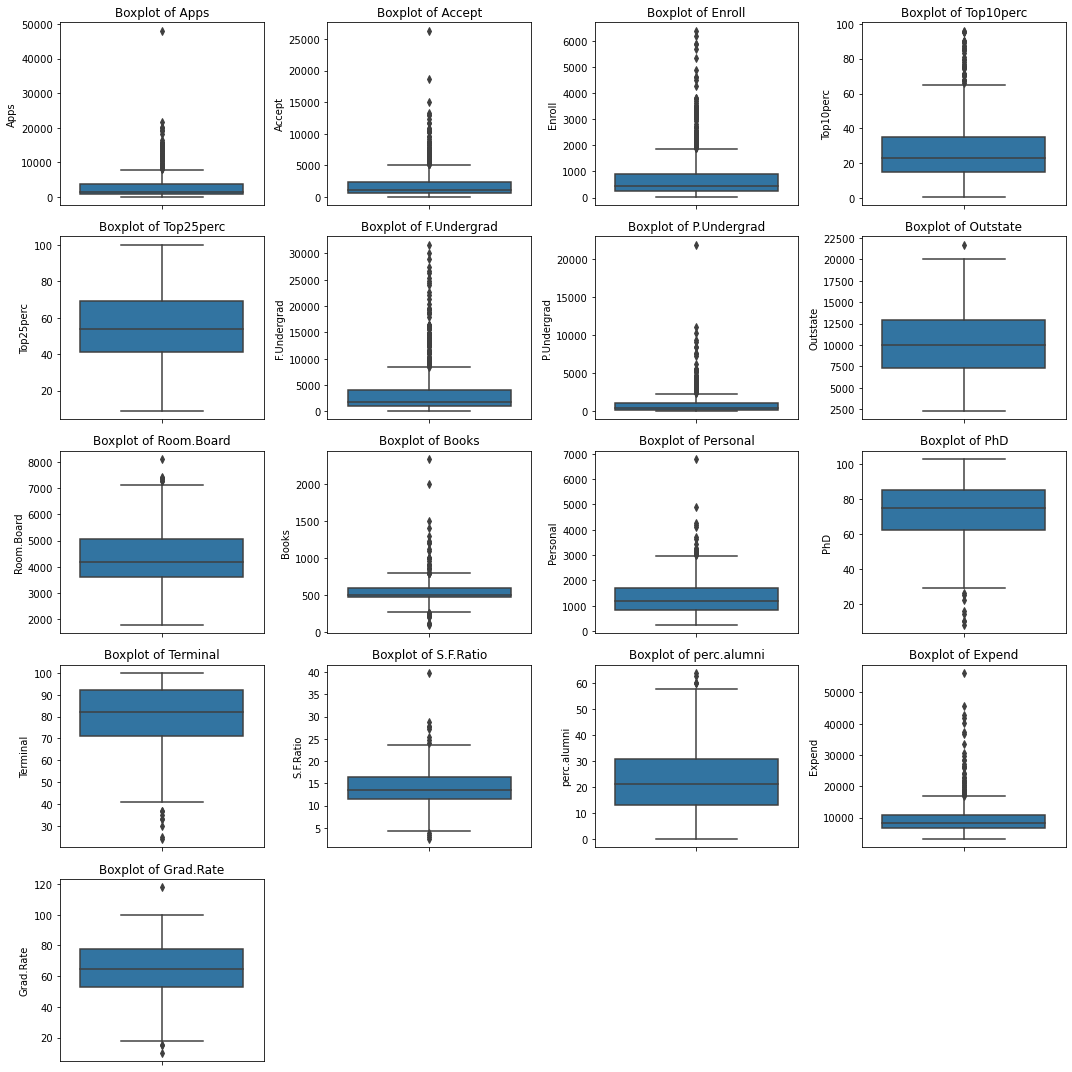

In [39]:
plt.figure(figsize=(15,15))
feature_list = newdf.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = newdf[feature_list[i]], data = newdf)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

### Dataset after scaling

In [40]:
df_pca_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


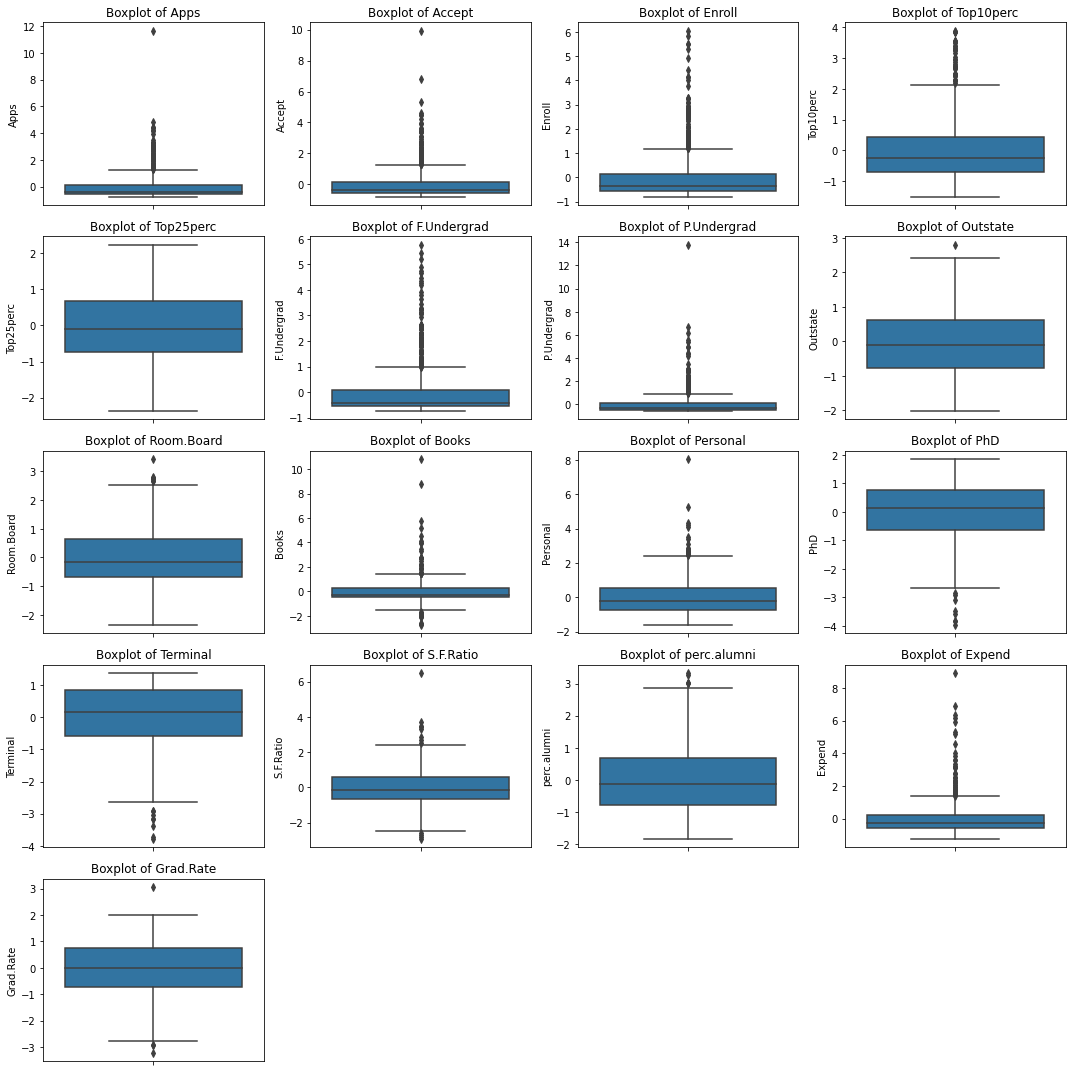

In [41]:
plt.figure(figsize=(15,15))
feature_list = df_pca_scaled.columns
for i in range(len(feature_list)):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y = df_pca_scaled[feature_list[i]], data = df_pca_scaled)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

From the above two graphs, we can say that:
- There is no difference in outliers of the dataset before & after scaling. Scaling of data just transforms all variables in the dataset to a same range and it has no effect whatsoever on outliers in the dataset.

## Q2.5) Extract the eigenvalues and eigenvectors. (Using Sklearn PCA Print Both)

In [42]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [43]:
#Extract eigen vectors
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [44]:
#Check the eigen values
#Note: This is always returned in descending order
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

## Q2.6) Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [45]:
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12',
                                               'PC13','PC14', 'PC15', 'PC16', 'PC17'],
                                    index = df_pca_scaled.columns)
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237,-0.042486,-0.103090,-0.090227,0.052510,0.043046,0.024071,0.595831,0.080633,0.133406,0.459139,0.358970
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535,-0.012950,-0.056271,-0.177865,0.041140,-0.058406,-0.145102,0.292642,0.033467,-0.145498,-0.518569,-0.543427
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558,-0.027693,0.058662,-0.128561,0.034488,-0.069399,0.011143,-0.444638,-0.085697,0.029590,-0.404318,0.609651
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693,-0.161332,-0.122678,0.341100,0.064026,-0.008105,0.038554,0.001023,-0.107828,0.697723,-0.148739,-0.144986
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092,-0.118486,-0.102492,0.403712,0.014549,-0.273128,-0.089352,0.021884,0.151742,-0.617275,0.051868,0.080348
F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454,-0.043454,-0.025076,0.078890,-0.059442,0.020847,-0.081158,0.056177,-0.523622,-0.056373,0.009916,0.560363,-0.414705
P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385,-0.191199,0.061042,0.570784,0.560673,-0.223106,0.100693,-0.063536,0.125998,0.019286,0.020952,-0.052731,0.009018
Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532,-0.030000,0.108529,0.009846,-0.004573,0.186675,0.143221,-0.823444,-0.141856,-0.034012,0.038354,0.101595,0.050900
Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919,0.162755,0.209744,-0.221453,0.275023,0.298324,-0.359322,0.354560,-0.069749,-0.058429,0.003402,-0.025929,0.001146
Books,0.064758,0.056342,0.677412,0.087089,-0.127289,0.641055,-0.149692,0.213293,-0.133663,-0.082029,0.031940,-0.028159,0.011438,-0.066849,-0.009439,0.002883,0.000773


## Q2.7) Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). 

### Explicit form of the first PC

In [46]:
for i in range (0,17):
    print("({} * {})+".format(round(df_extracted_loadings.iloc[i,0],2),round(df_pca_scaled.iloc[0,i],2)),end=" ")

(0.25 * -0.35)+ (0.21 * -0.32)+ (0.18 * -0.06)+ (0.35 * -0.26)+ (0.34 * -0.19)+ (0.15 * -0.17)+ (0.03 * -0.21)+ (0.29 * -0.75)+ (0.25 * -0.96)+ (0.06 * -0.6)+ (-0.04 * 1.27)+ (0.32 * -0.16)+ (0.32 * -0.12)+ (-0.18 * 1.01)+ (0.21 * -0.87)+ (0.32 * -0.5)+ (0.25 * -0.32)+ 

## Q2.8) Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [47]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

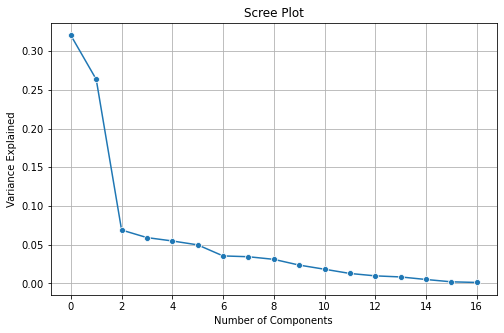

In [48]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(0,17),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

Cumulative values of eigen values help us decide the optimum number of principal components by considering the cumlative explained variance ratio with a certain confidence interval.

In this case, we take confidence level as 85%, hence, we use 7 principal components.

## Q2.9) Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? (Hint: Write Interpretations of the Principal Components Obtained)

In [49]:
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7']]
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237,-0.042486
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535,-0.012950
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558,-0.027693
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693,-0.161332
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092,-0.118486
F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454,-0.043454,-0.025076
P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385,-0.191199,0.061042
Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532,-0.030000,0.108529
Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919,0.162755,0.209744
Books,0.064758,0.056342,0.677412,0.087089,-0.127289,0.641055,-0.149692


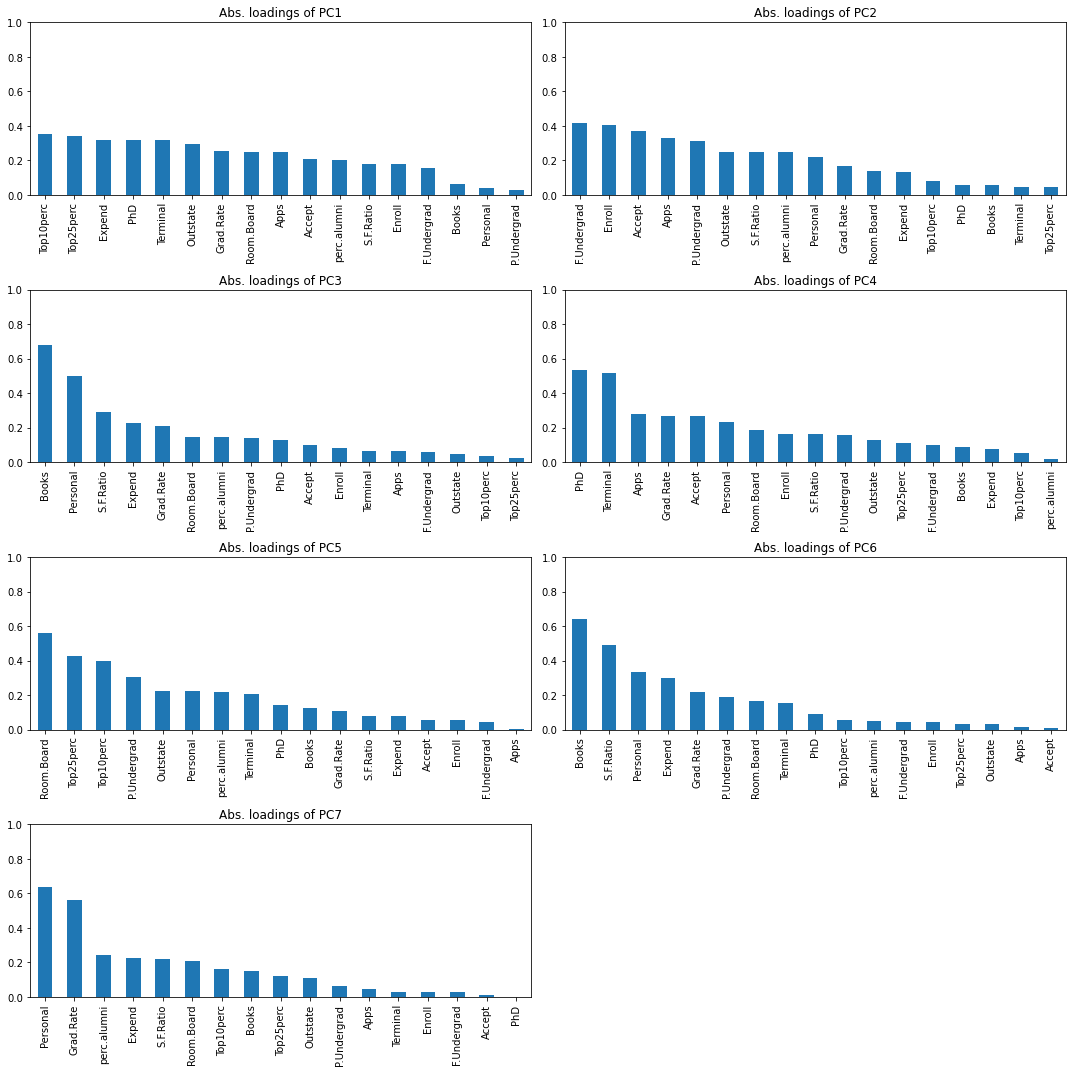

In [50]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (15,15))
for i in range(len(df_selected.columns)):
    plt.subplot(4,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

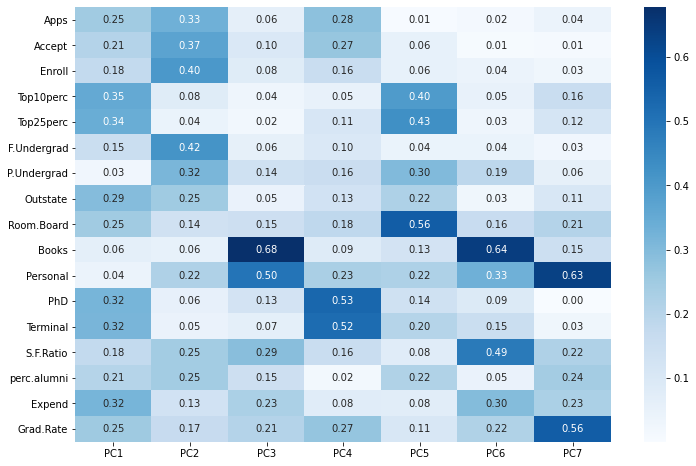

In [51]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

- Principal Component Analysis in this case study reduced the dimensionality of the dataset from 17 to 7 as it gives us better perspective and less complexity.
- It helps in minimizing redundant data and helps in refining useful data as when we use process-intensive algorithms (like many supervised algorithms) on the data so we need to get rid of redundancy.
- PCA gave us linearly independent and different combinations of features which we can further to describe our data differently as it gives a whole new perspective.

7 Principal Components are enough to perform further analysis (as they cover 85% of variance of the dataset).

## THE END